In [203]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [204]:
tf.set_random_seed(777)

In [205]:
#import train set
from tensorflow.examples.tutorials.mnist import input_data

In [206]:
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)
print(mnist.train.num_examples)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
55000


In [231]:
# 0 ~ 9까지의 숫자 갯수
nb_classes = 10

In [376]:
# MNIST Data image of shape = 28 * 28 = 784
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes]) # one-hot으로 주어짐.

In [377]:
# Variable
W1 = tf.Variable(tf.random_normal([784, 10]), name="weight1")
b1 = tf.Variable(tf.random_normal([10]), name="bias1")

logits1 = tf.matmul(X, W1) + b1
layer1 = tf.nn.softmax(logits1)
print(layer1)

Tensor("Softmax_51:0", shape=(?, 10), dtype=float32)


In [378]:
W2 = tf.Variable(tf.random_normal([10, 10]), name="weight2")
b2 = tf.Variable(tf.random_normal([10]), name="bias2")

logits2 = tf.matmul(layer1, W2) + b2
layer2 = tf.nn.softmax(logits2)

In [379]:
W3 = tf.Variable(tf.random_normal([10, nb_classes]), name="weight3")
b3 = tf.Variable(tf.random_normal([nb_classes]), name="bias3")

logits3 = tf.matmul(layer2, W3) + b3
hypothesis = tf.nn.softmax(logits3)

In [380]:
# cost
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

In [396]:
# Minimize Cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 10)
train = optimizer.minimize(cost)

In [397]:
# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
real = tf.argmax(Y, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, real), dtype=tf.float32))

In [398]:
# Prepare session
session = tf.Session()
session.run(tf.global_variables_initializer())

In [399]:
# Slice the data, epochs, batch_size
training_epochs = 15
batch_size = 100
total_iterator = int(mnist.train.num_examples / batch_size)
print(mnist.train.num_examples)
print(total_iterator)

55000
550


In [400]:
# Fit the train
for epoch in range(training_epochs):
    avg_cost = 0
    total_iterator = int(mnist.train.num_examples / batch_size)
    for i in range(total_iterator):
        batch_x_train, batch_y_train = mnist.train.next_batch(batch_size)
        c_val, _ = session.run([cost, train],
                               feed_dict={X: batch_x_train, Y: batch_y_train})
        avg_cost += c_val / batch_size
    print("Epoch:", "%04d" % (epoch + 1), ", Cost:", "{:.5f}".format(avg_cost))
    

print("Accuracy:", session.run(accuracy,
                               feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 , Cost: 6.67396
Epoch: 0002 , Cost: 5.59451
Epoch: 0003 , Cost: 5.25189
Epoch: 0004 , Cost: 5.02164
Epoch: 0005 , Cost: 4.87751
Epoch: 0006 , Cost: 4.92527
Epoch: 0007 , Cost: 4.77447
Epoch: 0008 , Cost: 4.80317
Epoch: 0009 , Cost: 4.75155
Epoch: 0010 , Cost: 4.71517
Epoch: 0011 , Cost: 4.68585
Epoch: 0012 , Cost: 4.64615
Epoch: 0013 , Cost: 4.65094
Epoch: 0014 , Cost: 4.67408
Epoch: 0015 , Cost: 4.61568
Accuracy: 0.6462


1709
Label:  [9]
Prediction:  [5]


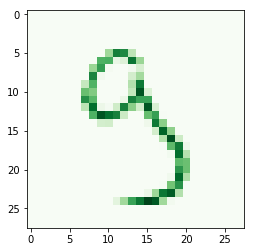

In [408]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print(r)
print("Label: ", session.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))

sample_image = mnist.test.images[r: r+1]
print("Prediction: ", session.run(tf.argmax(hypothesis, 1),
                                  feed_dict={X: sample_image}))

plt.imshow(
    sample_image.reshape(28, 28),
    cmap='Greens',
    interpolation='nearest')
plt.show()